# Exam on Convolutional Neural Networks (CNN)

Welcome to the Convolutional Neural Networks (CNN) practical exam. In this exam, you will work on an image classification task to predict weather the parkinglot is occupied or empty. You are provided with a dataset of parkinglot images, and your task is to build, train, and evaluate a CNN model.

---

## Dataset Overview
### **Dataset:**
* Just run the command under the `Load Data` section to get the data downloaded and unzipped or you can access it [here](www.kaggle.com/datasets/khaledzsa/parkinglot-occupation)
### **Dataset Name:** ParkingLot Occupation

### **Description:**  
The dataset contains images of labeld parkinglot images for classification purposes. Each image belongs to one of the 2 classes, representing the label.

### **Labels:**
* `empty`
* `occupied`


## Load Data
Run the following command to get the data and unzip it, alternatively you can access the data [here](www.kaggle.com/datasets/khaledzsa/parkinglot-occupation).

In [ ]:
#!kaggle datasets download -d khaledzsa/parkinglot-occupation
#!unzip parkinglot-occupation.zip

## Import Libraries

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout,Rescaling
import tensorflow as tf

from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator


import numpy as np

## Data Preprocessing
In this section, preprocess the dataset by:
- Loading the images from the file paths.
- Resizing the images to a consistent size.
- Normalizing pixel values.

Add more if needed!

In [ ]:
from google.colab import files
import zipfile
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator


## Data Splitting
In this section, we will split our dataset into three parts:

* `train` Folder: Training set (85%).
* `train` Folder: Validation set (15%).
* `test` Folder: Test set (100%).

In [ ]:
disc_url= '/content/ParkingLot_Occupation/train'

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory =disc_url,
    labels='inferred',
    label_mode='binary',
    class_names=['empty', 'occupied'],
    color_mode='rgb',
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=123,
    validation_split=0.15,
    subset='training'
)

Found 1382 files belonging to 2 classes.
Using 1175 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory =disc_url,
    labels='inferred',
    label_mode='binary',
    class_names=['empty', 'occupied'],
    color_mode='rgb',
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=123,
    validation_split=0.15,
    subset='validation'
)

Found 1382 files belonging to 2 classes.
Using 207 files for validation.


In [ ]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory ='/content/ParkingLot_Occupation/test',
    labels='inferred',
    label_mode='binary',
    class_names=['empty', 'occupied'],
    color_mode='rgb',
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=123,
)

Found 344 files belonging to 2 classes.


## Building the CNN Model
In this section, define the architecture of the CNN model. The architecture may consist of:
- Convolutional layers with max-pooling
- Dropout layers
- Flatten layer
- Dense layers
- Output layer

Add and remove any of these as needed!

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

input_shape = (64, 64, 3)
num_classes = 1
dropout_rate = 0.5

model = Sequential([
    # First convolutional layer
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D(pool_size=(2, 2)),

    # Second convolutional layer
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # Third convolutional layer
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # Flatten layer
    Flatten(),

    # Dense Layer
    Dense(512, activation='relu'),
    Dropout(dropout_rate),

    # Output layer
    Dense(num_classes, activation='sigmoid')
])
model.summary()

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 512)                 │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,453,569 (9.36 MB)

 Trainable params: 2,453,569 (9.36 MB)

 Non-trainable params: 0 (0.00 B)

## Training the Model
Train the CNN model using the training data and validate it on the validation set.

In [ ]:
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation='relu',input_shape=(64, 64, 3)),

    Conv2D(12, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(20, (3,3), activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(6, activation='relu'),
    Dropout(0.25),
    Dense(12, activation='relu'),
    Dropout(0.25),
    Dense(1, activation='sigmoid')
])

model.summary()




Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 60, 60, 12)          │           3,468 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 30, 30, 12)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 28, 28, 20)          │           2,180 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 14, 14, 20)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 3920)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 6)                   │          23,526 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 6)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 12)                  │              84 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 12)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              13 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,167 (117.84 KB)

 Trainable params: 30,167 (117.84 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
opt=Adam(learning_rate=0.01)

model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 13s 278ms/step - accuracy: 0.5238 - loss: 0.6926 - val_accuracy: 0.5459 - val_loss: 0.6902
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 19s 246ms/step - accuracy: 0.5263 - loss: 0.6919 - val_accuracy: 0.5459 - val_loss: 0.6899
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 10s 227ms/step - accuracy: 0.5272 - loss: 0.6918 - val_accuracy: 0.5459 - val_loss: 0.6901
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 10s 271ms/step - accuracy: 0.5240 - loss: 0.6921 - val_accuracy: 0.5459 - val_loss: 0.6901
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 11s 283ms/step - accuracy: 0.5194 - loss: 0.6925 - val_accuracy: 0.5459 - val_loss: 0.6900
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 8s 223ms/step - accuracy: 0.5171 - loss: 0.6928 - val_accuracy: 0.5459 - val_loss: 0.6903
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 10s 270ms/step - accuracy: 0.5262 - loss: 0.6919 - val_accuracy: 0.5459 - val_loss: 0.6899
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 10s 274ms/step - accuracy: 0.5178 - loss: 0.6929 - val_accur

## Evaluate the Model
Evaluate the performance of the model on the test set.

In [ ]:
model.evaluate(val_ds)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.5304 - loss: 0.6914


[0.6900794506072998, 0.5458937287330627]

## Make Predictions
Use the trained model to make predictions on new or unseen parkinglot images.

if you need new, we prepared some data for you [here](www.kaggle.com/datasets/khaledzsa/parkinglot-occupation), or you can simply run the following command to get the data and unzip it.

<small>Note: please note that the file contain MetaData to tell you what each image contains <b>THIS IS JUST FOR YOU TO MAKE SURE</b></smmall>

If you ran the command above, you should have a file called ParkingLot_Occupation in your current directory. which contains the testing dataset.
If you ran the command above <span style='color:red;'>DON'T RUN THIS CELL</span>

In [ ]:
#!kaggle datasets download -d khaledzsa/parkinglot-occupation
#!unzip parkinglot-occupation.zip

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(test_ds) > 0.5

print(accuracy_score(np.concatenate([y for x, y in test_ds], axis=0),y_pred))

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step
0.5261627906976745


## Model Performance Visualization
Visualize performance metrics such as accuracy and loss over the epochs.

<Axes: >

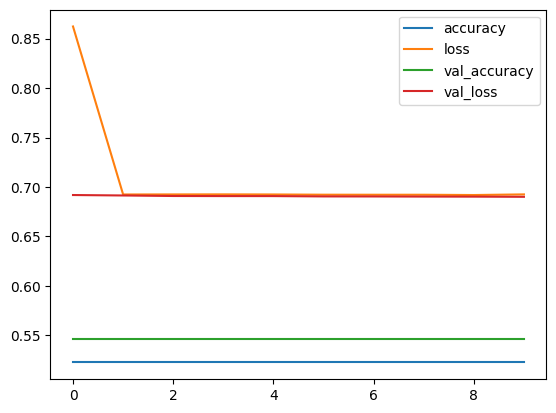

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


pd.DataFrame(history.history).plot()

## Save the Model
Save the trained CNN model for submission.

In [ ]:
model.save('location.keras')

In [ ]:
model2 = tf.keras.models.load_model('location.keras')

In [ ]:
model2.evaluate(test_ds)

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.4977 - loss: 0.6943


[0.6918131113052368, 0.5261628031730652]

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., resizing images, normalization, data augmentation). How do these preprocessing steps improve the performance of your CNN model?
2. **Model Architecture**: Describe the architecture of your CNN model (e.g., number of convolutional layers, kernel sizes, pooling layers). Why did you choose this structure, and how do you expect each layer to contribute to feature extraction?
3. **Activation Functions**: Justify your choice of activation functions. How do they influence the training and output of your CNN?
4. **Training Process**: Discuss your choice of batch size, number of epochs, and optimizer. How did these decisions impact the training process and the convergence of the model?
5. **Loss Function and Metrics**: Explain why you chose the specific loss function and evaluation metrics for this classification task. How do they align with the goal of correctly classifying parkinglot?
6. **Regularization Techniques**: If you used regularization methods like dropout or batch normalization, explain why you implemented them and how they helped prevent overfitting in your model.
7. **Model Evaluation**: Justify the method you used to evaluate your model's performance on the test set. Why did you select these evaluation techniques, and what insights did they provide about your model's accuracy and generalization ability?
8. **Model Visualization**: Explain the significance of the performance visualizations (e.g., accuracy and loss curves). What do they tell you about your model's training process and its ability to generalize?
9. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?

### Answer Here:

# Data Preprocessing :
resizing image it's better approch sincs the files all ready balanced I only need to resize the images.

# Model Architecture :
Convolutional layers starts with 32 and double it with each layer and kenal (3,3) to check evrey bixeles with this range , max-pooling(2,2), dropout layer(0.5),flatten layer to maket easy for trainng the model.

# Activation Functions:
In this model either the parking is empty or occubied we need to be persice durring the ruuning so it's better choosing sigmoid.


# Training Process:
Since the model take too much time i only choose fewer epochs so since the accurcy still risng near 1 there is no need to medfiy it.

# Loss Function and Metrics
Using binary_crossentropy & accurcey matrics, since our class have 2 classes it's suitble to use binary_crossentropy, I use accurecy sicne needing an accurit score .

# Model Evaluation :
aacurcey is best when wanting to find wich catagory the image is .

# Model Visualization :
According to the chart the performnce of my model is good since val is high more than the training

# Overfitting and Underfitting:
It is not nither over overfitting and underfitting, it's balance